In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [6]:
titanic_dataset = pd.read_csv("f:Titanic-Dataset.csv")

# print(titanic_df.head(10))

titanic_df= pd.DataFrame(titanic_dataset)

# print(titanic_df.columns)
# print(titanic_dataset.dtypes)

# print(titanic_df.describe())


In [7]:
# Check for missing values with .isnull().sum().
check_value = titanic_df["Age"].isnull().sum()
print(check_value)#.value_counts())


# Replace missing Age values with the mean age (using Numpy).
age_mean = np.nanmean(check_value,dtype= int)
replace_value =np.where(np.isnan(check_value),age_mean,check_value)
print(replace_value)


#Fill missing Embarked values with the most common port.
# print(titanic_dataset["Embarked"].isnull().value_counts().sum())
Apply_mode= titanic_dataset["Embarked"].mode()#value_counts()
# print(Apply_mode.value_counts())
titanic_dataset["Embarked"] =titanic_dataset["Embarked"].fillna(Apply_mode)


177
177


In [8]:
# How many passengers were onboard?
print(titanic_dataset["PassengerId"].sum())
# What is the average Age?
print(titanic_dataset["Age"].mean().astype(int))
# What is the average Fare?
print(titanic_dataset["Fare"].mean().astype(int))
# How many males and females were there?
print(titanic_dataset["Sex"].value_counts())


397386
29
32
Sex
male      577
female    314
Name: count, dtype: int64


Part B – Data Analysis (Pandas)

In [9]:
#How many survived vs. did not survive?
ratio_sur = titanic_dataset["Survived"].value_counts()
print(f"not Survived  :{ratio_sur[0]}\nSurvived :{ratio_sur[1]}")
# What percentage of passengers survived?
titanic_dataset["Survived"].value_counts().sum()
print(ratio_sur[1]/891*100)

# Find survival rates for 1st, 2nd, and 3rd class.
# titanic_dataset[["Pclass","Fare"]]
survival_rate = titanic_dataset.groupby("Pclass")["Survived"].mean()*100
print(survival_rate)
# Divide passengers into age groups:  0–12 = Child,13–19 = Teen,20–40 = Adult,41+ = Senior
bins = [0,12,13,19,20,40,41]
labels =["child-A","teen-A","teen-B","adult-A","adult-B","senior"]
titanic_dataset["Agegroup"]= pd.cut(titanic_dataset["Age"],bins= bins,labels=labels,right=True)
divide_passenger = titanic_dataset.groupby("Agegroup",observed=False)["Survived"].mean()*100
print(divide_passenger.astype(int))


not Survived  :549
Survived :342
38.38383838383838
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Agegroup
child-A     57
teen-A     100
teen-B      39
adult-A     20
adult-B     39
senior      25
Name: Survived, dtype: int64


Part C – Visualization (Matplotlib & Seaborn)

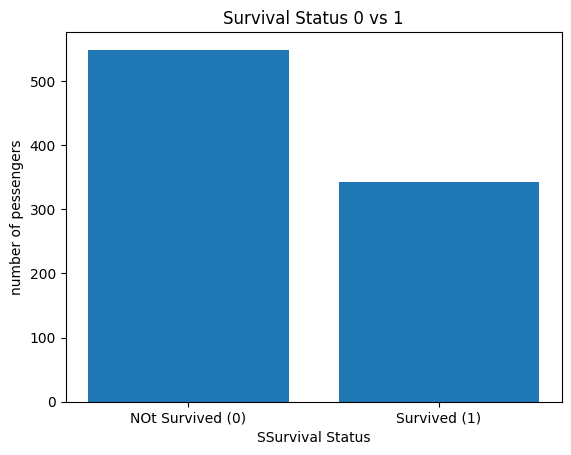

In [10]:
bar_plot = titanic_dataset["Survived"].value_counts()
plt.bar(bar_plot.index,bar_plot.values)
plt.xticks([0,1],["NOt Survived (0)","Survived (1)"])
plt.title("Survival Status 0 vs 1")
plt.xlabel("SSurvival Status")
plt.ylabel("number of pessengers")
plt.show()

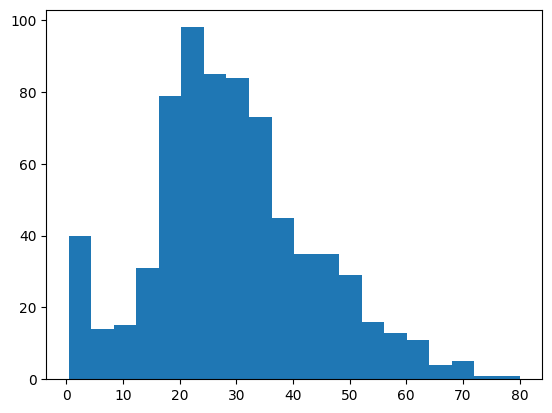

In [11]:
plt.hist(titanic_dataset["Age"],bins =20)
plt.show()

([<matplotlib.patches.Wedge at 0x25570c4c1a0>,
 [Text(-0.5366677435523016, 1.0733069146476608, 'male'),
  Text(0.49194551760179267, -0.9838646287531149, 'female')])

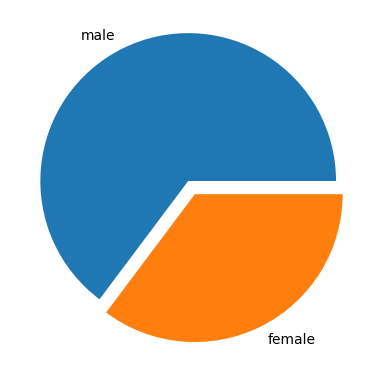

In [12]:
var = titanic_dataset["Sex"].value_counts()
plt.pie(var.values,labels=var.index,explode=[0.1,0])


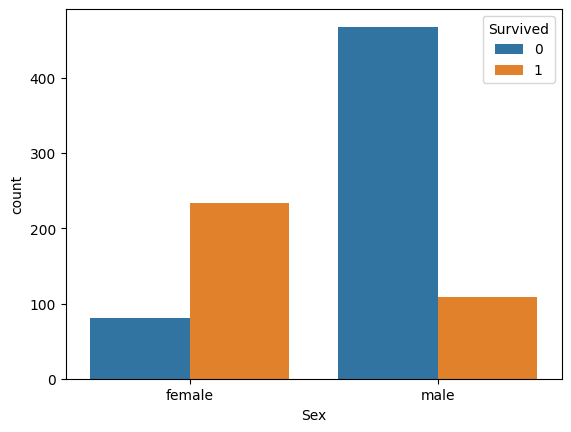

In [13]:
# Countplot: Survived by Sex (Who survived more?).
sns.countplot(x="Sex",hue="Survived",data=titanic_dataset,order=["female","male"],)
plt.show()

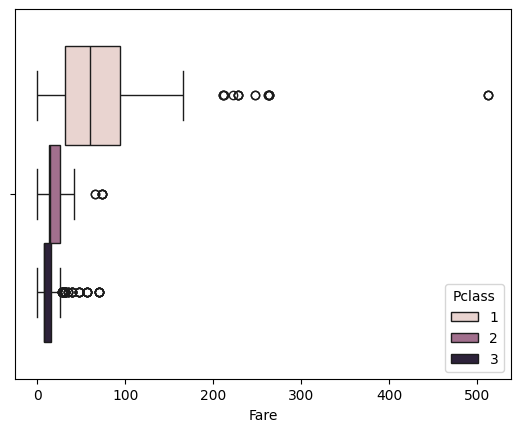

TypeError: 'DataFrame' object is not callable

In [75]:
sns.boxplot(x="Fare",hue="Pclass",data=titanic_dataset)
plt.show()


<Axes: xlabel='Age'>

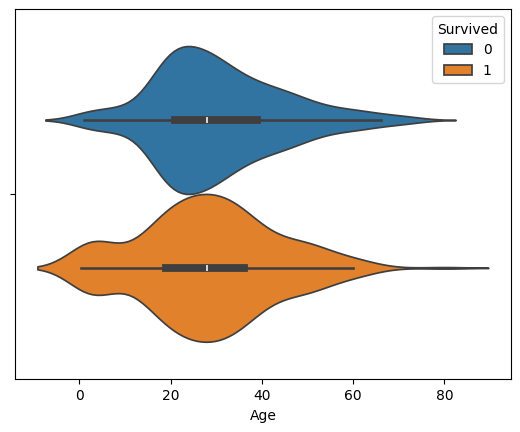

In [15]:
# Violinplot: Age by Survived (Age distribution among survivors).
sns.violinplot(x="Age",hue="Survived",data=titanic_dataset)

<Axes: >

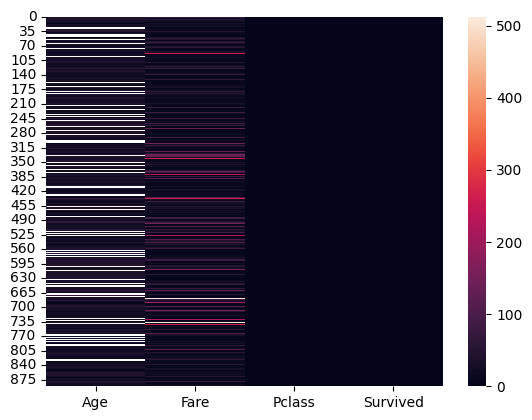

In [16]:
sns.heatmap(titanic_dataset[["Age", "Fare", "Pclass", "Survived"]])

In [52]:
# Part D
# 1. Empirical Probability (From Data)
overall_probability = titanic_dataset.groupby("Pclass")["Survived"].mean()
print(overall_probability)
gender_probability = titanic_dataset.groupby(["Pclass","Sex"])["Survived"].mean()
print(gender_probability)
# titanic_dataset


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [60]:
# Theoritical probability
# titanic_dataset["Pclass"]
theoritical_survival = 0.5
pclass =1/3
print("theoritical_survival",theoritical_survival)
print("theoritical_pclass",pclass)

theoritical_survival 0.5
theoritical_pclass 0.3333333333333333


# Part E – Insights & Reporting
Answer the following in your notebook/report:
<!-- Did women survive at a higher rate than men? -->
 female were more survived compare than male
<!-- Which class had the best survival chance? -->
1 class has best surv

<!-- Did age play a role in survival? -->
yes children were greate role in survived
<!-- Was Fare (ticket price) related to survival? -->
yes because 1st class survived more 
<!-- How do empirical probabilities differ from theoretical probabilities? -->
yes high different between emprical probabiliry vs theretical because in emperical we are taking data from titanic dataset and in theretical we are jsut assuming the data 



